In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import string
from nltk.tokenize import word_tokenize
from collections import Counter
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

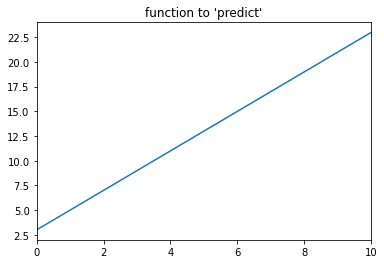

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
25/25 [==============================] - 0s 2ms/sample - loss: 0.0671 - mean_squared_error: 0.0671
[0.06709383428096771, 0.067093834]


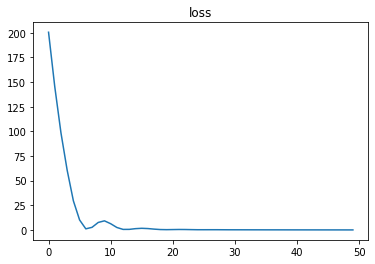

predicted value for 5: [[12.915163]]


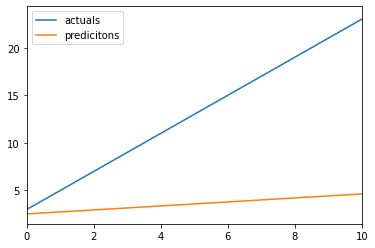

[[2.5224261]
 [2.7323804]
 [2.9423342]
 [3.152289 ]
 [3.3622427]]
[[3.        ]
 [3.2020202 ]
 [3.4040404 ]
 [3.60606061]
 [3.80808081]]


In [15]:
# Simple linear model

# y = 2x + 3

x = []
y = []

for index in np.linspace(0, 10, 100):
    x.append(index)
    y.append(index*2+3)

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

plt.plot(x, y)
plt.title('function to \'predict\'')
plt.xlim([0,max(x)])
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = tf.keras.Sequential()
model.add(layers.Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(layers.Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=.01)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()
history = model.fit(x_train, y_train, epochs=50, verbose=0)
print(model.evaluate(x_test, y_test))
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()
print('predicted value for 5: {}'.format(model.predict([5])))

plt.plot(x, y, label='actuals')
plt.plot(model.predict(x), label='predicitons')
plt.xlim([0,max(x)])
plt.legend()
plt.show()

print(model.predict(x)[:5])
print(y[:5])

In [ ]:
model.save('saved_model/first_model')
model = tf.keras.models.load_model('saved_model/first_model')
print(model.summary())